#의사결정 나무

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split #train set / test set 나눠서 작동

In [89]:
tennis_data = pd.read_csv('/content/play tennis1.csv')
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
...,...,...,...,...,...
184,sunny,hot,high,True,no
185,overcast,hot,high,False,yes
186,rainy,mild,high,False,yes
187,rainy,cool,normal,False,yes


In [90]:
tennis_data.describe()

,outlook,temp,humidity,windy,play
count,189,189,189,189,189
unique,3,3,2,2,2
top,sunny,mild,normal,False,yes
freq,68,79,97,109,123


In [91]:
tennis_data.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

In [92]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = tennis_data[['outlook','temp', 'humidity', 'windy']]
tennis_data.play = tennis_data.play.replace('no',0)
tennis_data.play = tennis_data.play.replace('yes',1)
Y = tennis_data['play']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

onehot = OneHotEncoder(sparse=False)
onehot.fit(X_train, Y_train)
X_train = onehot.transform(X_train)
X_test = onehot.transform(X_test)

In [93]:
X_train[0]

array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0.])

In [99]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state= 0 , max_depth = 3)
DT_model.fit(X_train, Y_train)
Y_pred = DT_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=0, max_depth=.3)
dt_model.fit(X_train, Y_train)
dt_Y_pred = dt_model.predict(X_test)
print("dt score : {:.3f}".format(dt_model.score(X_train,Y_train)))
print(classification_report(Y_test, dt_Y_pred))

dt score : 0.629
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.70      1.00      0.82        40

    accuracy                           0.70        57
   macro avg       0.35      0.50      0.41        57
weighted avg       0.49      0.70      0.58        57



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
feature_name = X.columns
feature_importance =DT_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.3199993939440361, 'temp'),
 (0.2722004409037451, 'outlook'),
 (0.00365468609662428, 'humidity'),
 (0.0, 'windy')]

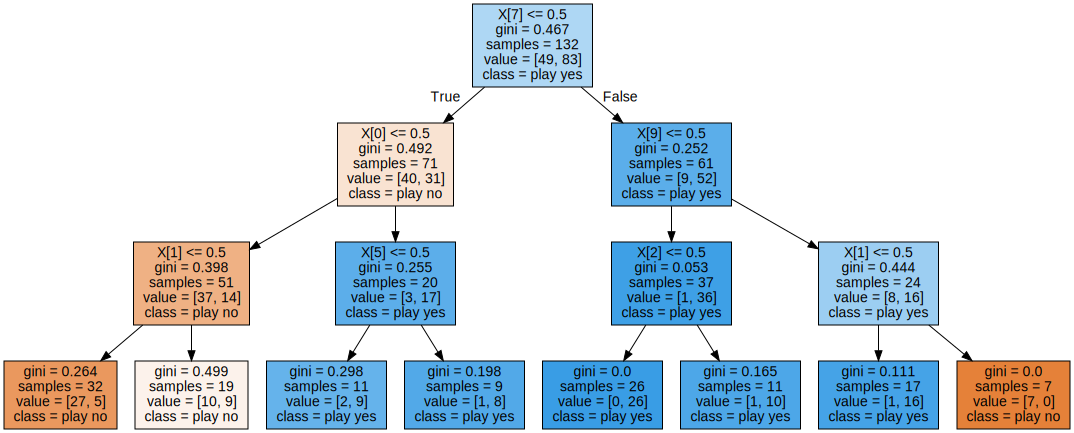

In [97]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model, out_file="tree.dot", class_names=["play no","play yes"],
                impurity=True, filled = True)


#파일열기
with open("tree.dot", encoding="utf-8") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)